# Annotating spectra with spot-intensity

---

**Updated on:** 2023-09-15

> Author(s): Simon Knoblauch (simon.knoblauch@student.uni-tuebingen.de)  
> Input file(s): .mzML file to be annotated, .csv file containing list of spots
> Output file(s): .mzML file containing annotated MS1 Spectra
> Dependencies: pandas, numpy, matplotlib, ipympl, pathlib, pyopenms

**Please read the comments before proceeding to run the code and let us know if you run into any errors or find undocumented pieces of code.**

In [1]:
import pyopenms as oms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipympl
from pyopenms.plotting import plot_spectrum,plot_chromatogram
from pathlib import Path
import sys
sys.path.append(r"..")
import microspot_reader as msu
import microspot_reader.plots as plots
%matplotlib widget

2023-10-24 10:23:00.557 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-10-24 10:23:00.565 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-10-24 10:23:00.567 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-10-24 10:23:00.572 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-10-24 10:23:00.578 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-10-24 10:23:00.582 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


## User Input

In [2]:
# Filepath of the mzml file to be annotated with bioactivity.
mzml_filepath=Path(r"/home/nesiron/petras/MicrospotReader/test_mzml/231004_TestAB_1.mzML")

# Filepath of the .csv file containing the spotlist.
spotlist_filepath=Path(r"/home/nesiron/petras/MicrospotReader/test_mzml/merged_data.csv")

# Folderpath to which the final result should be saved.
outputfolder=Path(r"../output")

# Scaling-Factor to scale the spot-intensity to.
intensity_scalingfactor=10e8

# m/z value at which the scaled spot intensity should be saved.
spot_mz=1000

In [3]:
# Create new MS Experiment and load mzml file to it.
exp=oms.MSExperiment()
oms.MzMLFile().load(mzml_filepath.as_posix(),exp)

# Read the .csv containing the merged spot list
spots=pd.read_csv(spotlist_filepath,index_col=0)

# Annotate the mzml file in the loaded experiment with a bioactivity.
msu.annotate_mzml(exp,spots,spot_mz,intensity_scalingfactor)

In [4]:
# Create the output-folder, if it does not exists
if not outputfolder.exists():
    outputfolder.mkdir()

# Genereate the new filename and save the MS Experiment to a .mzML file.
output_filename=outputfolder/Path(mzml_filepath.name.split(".")[0]+"_spotint.mzML")
oms.MzMLFile().store(output_filename.as_posix(),exp)

MS-Level:  1
RT:  243.879312


<Axes: xlabel='m/z', ylabel='Intensity'>

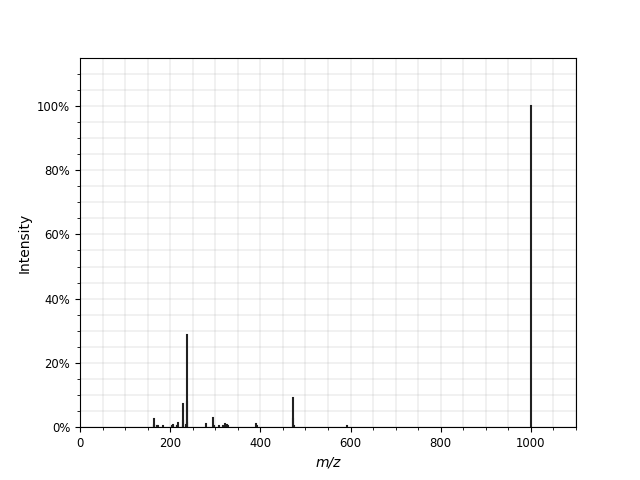

In [14]:
# Test-Plot of a spectrum containing the spot-intensity matching its RT
test=1510
print("MS-Level: ",exp[test].getMSLevel())
print("RT: ",exp[test].getRT())
fig,ax=plt.subplots()
plot_spectrum(exp[test])

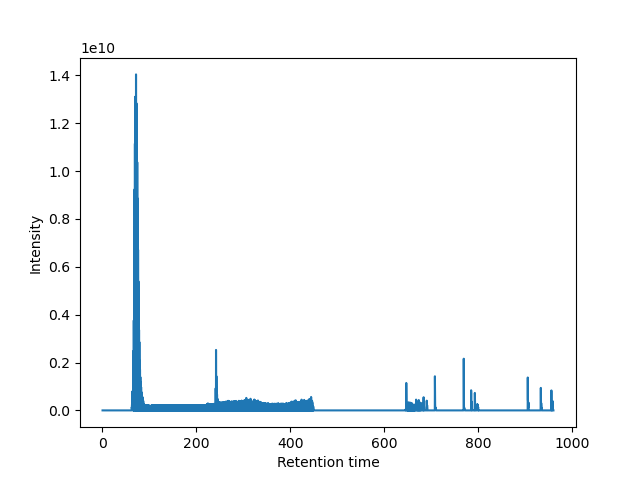

[Text(0.5, 1.0, 'TIC-Chromatogramm'),
 Text(42.597222222222214, 0.5, 'TIC'),
 Text(0.5, 23.52222222222222, 'Retention Time [s]')]

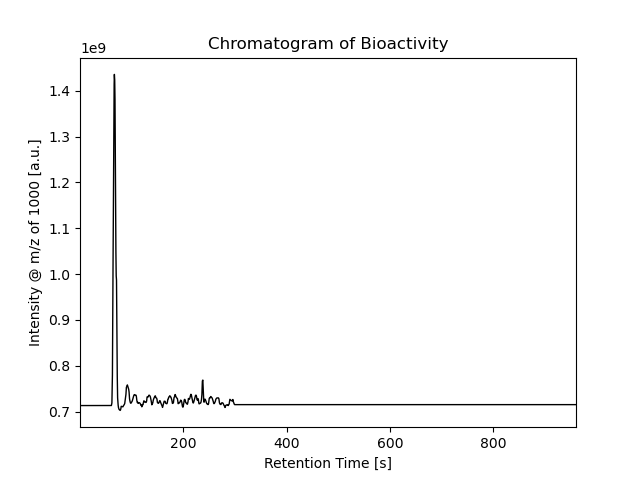

In [6]:
fig,ax=plt.subplots()
plots.plot_mzml_chromatogram(fig,ax,exp,spot_mz)

chrom=exp.getChromatogram(0)
fig,ax=plt.subplots()
plot_chromatogram(chrom)
ax.set(title="TIC-Chromatogramm",
       ylabel="TIC",
       xlabel="Retention Time [s]",
       )
